In [1]:
# download all the libraries required for this group assignment
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# load both the normal and testing data
ReadAdultData = pd.read_excel('data/adult.data.xlsx')
# ReadAdultTestData = pd.read_excel('adult.test.xlsx')

In [3]:
# show the normal data
ReadAdultData.head()

,Age,Work Class,Final Weight,Education,Education Number of Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# get information from the ReadAdultData
print('Information from the ReadAdultData\n')
ReadAdultData.info()
# get information from the ReadAdultTestData
# print('\n\n\nInformation from the ReadAdultTestData\n')
# ReadAdultTestData.info()

Information from the ReadAdultData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        32561 non-null  int64 
 1   Work Class                 32561 non-null  object
 2   Final Weight               32561 non-null  int64 
 3   Education                  32561 non-null  object
 4   Education Number of Years  32561 non-null  int64 
 5   Marital Status             32561 non-null  object
 6   Occupation                 32561 non-null  object
 7   Relationship               32561 non-null  object
 8   Race                       32561 non-null  object
 9   Sex                        32561 non-null  object
 10  Capital Gain               32561 non-null  int64 
 11  Capital Loss               32561 non-null  int64 
 12  Hours per Week             32561 non-null  int64 
 13  Native Country           

<h2>Desceribe the Dataset</h2>

In [5]:
ReadAdultData.describe(include='all')

,Age,Work Class,Final Weight,Education,Education Number of Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<h2>Check for missing values</h2>

In [6]:
ReadAdultData.isnull().sum()

Age                          0
Work Class                   0
Final Weight                 0
Education                    0
Education Number of Years    0
Marital Status               0
Occupation                   0
Relationship                 0
Race                         0
Sex                          0
Capital Gain                 0
Capital Loss                 0
Hours per Week               0
Native Country               0
Income                       0
dtype: int64

In [7]:
# check for the shape of the variable
ReadAdultData.shape

(32561, 15)

<h2>Rename Column</h2>

In [8]:
ReadAdultData.rename(columns={'Work Class':'Work_Class', "Final Weight":'Final_Weight', "Education Number of Years":'Education_Number_of_Years', "Marital Status":'Marital_Status', "Capital Gain":'Capital_Gain', "Capital Loss":'Capital_Loss', "Hours per Week":'Hours_per_Week', "Native Country":'Native_Country'}, inplace=True)

<h1>To many income classes</h1><br>
First of all, we can see that the income_class column has 4 unique classes, but we expect to have only two.

In [9]:
ReadAdultData.Income.value_counts(dropna=False)

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

<h1>Extra category</h1><br>
If we compare number of unique categorical features for other variables it's easy to see that workclass, occupation and native_country have one extra unique value (+1 unique values compare to the description from the Dataset Description.odt) in the data. One extra class equals to ?. It looks like this values has to be replaced with NaN.

In [10]:
ReadAdultData.Occupation.value_counts(dropna=False).to_frame()

,Occupation
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597
Handlers-cleaners,1370


In [11]:
ReadAdultData.Work_Class.value_counts(dropna=False).to_frame()

,Work_Class
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


<p>We can confirm that those are the only columns that have value equal to ?</p>

In [12]:
(ReadAdultData == ' ?').sum(axis=0)

Age                             0
Work_Class                   1836
Final_Weight                    0
Education                       0
Education_Number_of_Years       0
Marital_Status                  0
Occupation                   1843
Relationship                    0
Race                            0
Sex                             0
Capital_Gain                    0
Capital_Loss                    0
Hours_per_Week                  0
Native_Country                583
Income                          0
dtype: int64

<h1>Suspicios values with 9s</h1>
Two columns have max value with all 9s in them. It's common that people use values with all 9s in order to mark NaN values in columns with numerical values.

In [13]:
ReadAdultData.Capital_Gain.value_counts(dropna=False).head(10)

0        29849
15024      347
7688       284
7298       246
99999      159
3103        97
5178        97
4386        70
5013        69
8614        55
Name: Capital_Gain, dtype: int64

In [14]:
import heapq
heapq.nlargest(10, ReadAdultData.Capital_Gain.unique())

[99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051, 18481, 15831]

In [15]:
import heapq
heapq.nlargest(10, ReadAdultData.Hours_per_Week.unique())

[99, 98, 97, 96, 95, 94, 92, 91, 90, 89]

In case of hours_per_week we can see that there are some unique values that close to 99

In [16]:
Hours_per_Week_Counts = ReadAdultData.Hours_per_Week.value_counts()
largest_hours_per_week = heapq.nlargest(10, ReadAdultData.Hours_per_Week.unique())
Hours_per_Week_Counts[Hours_per_Week_Counts.index.isin(largest_hours_per_week)]

99    85
90    29
98    11
96     5
91     3
95     2
89     2
97     2
92     1
94     1
Name: Hours_per_Week, dtype: int64

If we check countwise it's clear that 99 is unusually large compare to other values. It also could be that 99 means 99+ hours and long tail might fit into this category.

<h1>Check for Duplicates</h1>

In [17]:
n_samples_before = ReadAdultData.shape[0]
n_samples_after = ReadAdultData.drop_duplicates().shape[0]

print(n_samples_before)
print(n_samples_after)
print("Duplicates removed: {:.2%}".format((n_samples_before - n_samples_after) / n_samples_before))

32561
32537
Duplicates removed: 0.07%


<h1>Apply first cleaning steps</h1><br>
These steps allow us to address biggest issues that we found so far. Without this fixes it will be harder to do data analysis.

After removing final weight column we get 10% of duplicates in the training data. We need to remove it before continuing our analysis in order to avoid biases.

In [18]:
def clean_dataset( ReadAdultData):
    # Test dataset has dot at the end, we remove it in order
    # to unify names between training and test datasets.
    ReadAdultData['Income'] = ReadAdultData.Income.str.rstrip('.').astype('category')
    
    # Remove final weight column since there is no use
    # for it during the classification.
    ReadAdultData = ReadAdultData.drop('final_weight', axis=1)
    
    # Duplicates might create biases during the analysis and
    # during prediction stage they might give over-optimistic
    # (or pessimistic) results.
    ReadAdultData = ReadAdultData.drop_duplicates()

    return ReadAdultData


<h1> Visualization for the columns</h1>

<h3>Work Class column </h3>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

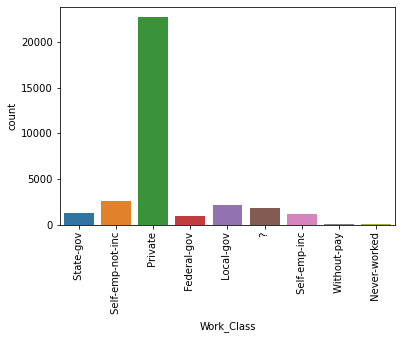

In [19]:
sns.countplot(x = ReadAdultData['Work_Class'])
plt.xticks(rotation = 90)

<h1>Education COlumn</h1>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

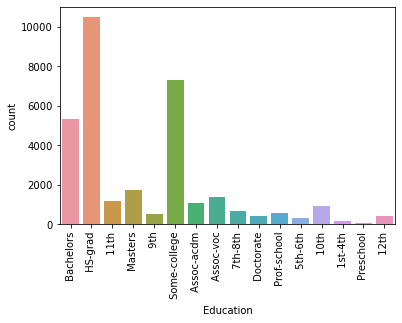

In [20]:
sns.countplot(x = ReadAdultData['Education'])
plt.xticks(rotation = 90)

<h3>Marital Status Column</h3>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

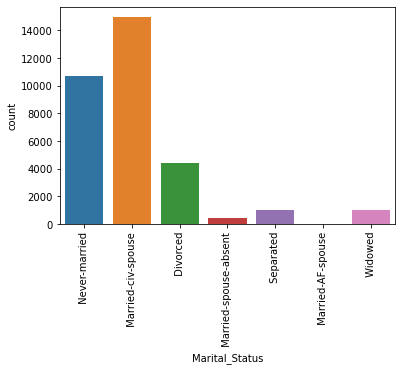

In [21]:
sns.countplot(x = ReadAdultData['Marital_Status'])
plt.xticks(rotation = 90)

<h3>Occupation Column</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

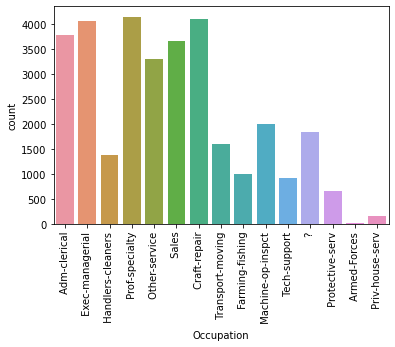

In [22]:
sns.countplot(x = ReadAdultData['Occupation'])
plt.xticks(rotation = 90)

<h3>Relationship Column</h3>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Not-in-family'),
  Text(1, 0, ' Husband'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

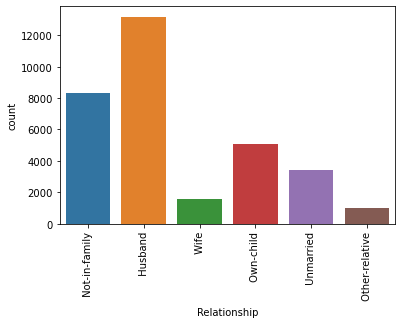

In [23]:
sns.countplot(x = ReadAdultData['Relationship'])
plt.xticks(rotation = 90)

<h3>Race Column</h3>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

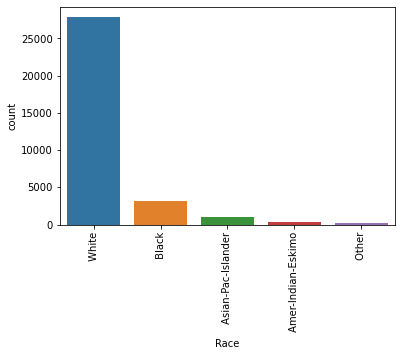

In [24]:
sns.countplot(x = ReadAdultData['Race'])
plt.xticks(rotation = 90)

<h3>Gender Column</h3>

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

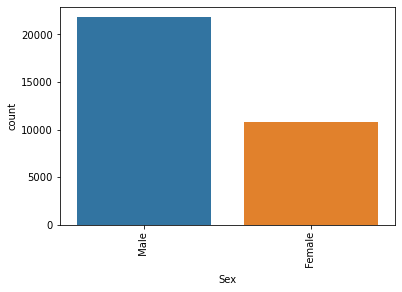

In [25]:
sns.countplot(x = ReadAdultData['Sex'])
plt.xticks(rotation = 90)

<h2>Captital Gain and Loss against Genders(sex)</h2>

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

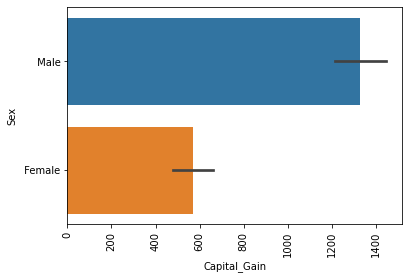

In [26]:
sns.barplot(x = ReadAdultData['Capital_Gain'], y= ReadAdultData['Sex'])
plt.xticks(rotation = 90)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

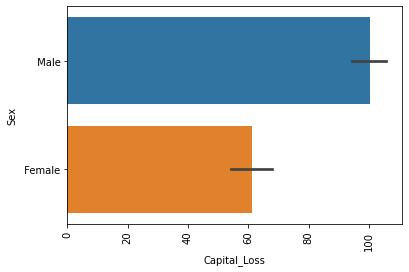

In [27]:
sns.barplot(x = ReadAdultData['Capital_Loss'], y= ReadAdultData['Sex'])
plt.xticks(rotation = 90)

<h3>Native Country Column</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

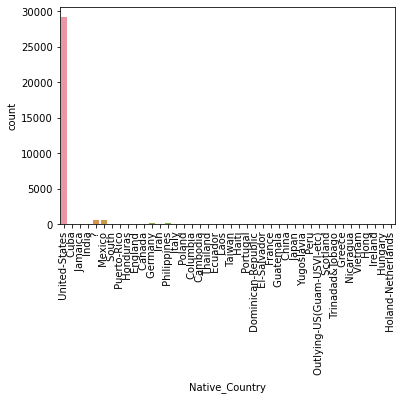

In [28]:
sns.countplot(x = ReadAdultData['Native_Country'])
plt.xticks(rotation = 90)

<h3>Income Column</h3>

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

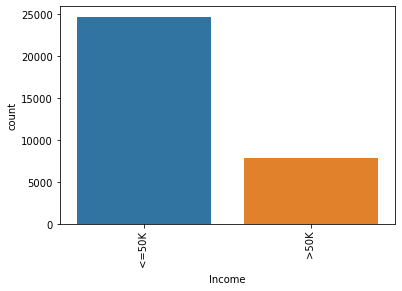

In [29]:
sns.countplot(x = ReadAdultData['Income'])
plt.xticks(rotation = 90)

<h3>Income and Race Column</h3>

<AxesSubplot:xlabel='Income', ylabel='count'>

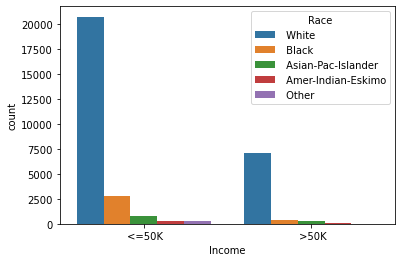

In [30]:
sns.countplot(x='Income', hue='Race', data = ReadAdultData)

<h3>Income and Gender Column</h3>

<AxesSubplot:xlabel='Income', ylabel='count'>

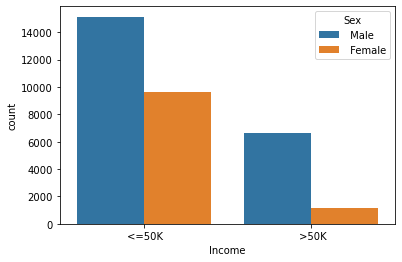

In [31]:
sns.countplot(x='Income', hue='Sex', data = ReadAdultData)

<h3>Income and Workclass Column</h3>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

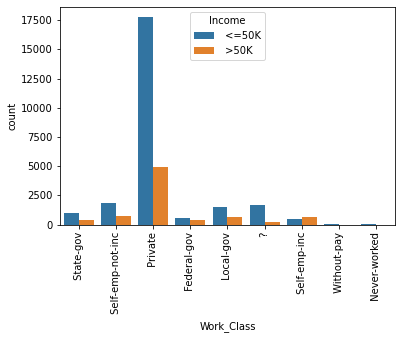

In [32]:
sns.countplot(x='Work_Class', hue='Income', data = ReadAdultData)
plt.xticks(rotation = 90)

<h3>Income and Education Column</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

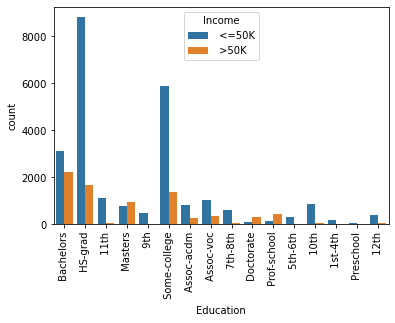

In [33]:
sns.countplot(x='Education', hue='Income', data = ReadAdultData)
plt.xticks(rotation = 90)

<h3>Income and Relationship Column</h3>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Not-in-family'),
  Text(1, 0, ' Husband'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

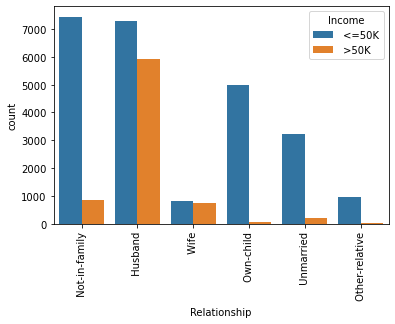

In [34]:
sns.countplot(x='Relationship', hue='Income', data = ReadAdultData)
plt.xticks(rotation = 90)

<h3>Income and Occupation Column</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

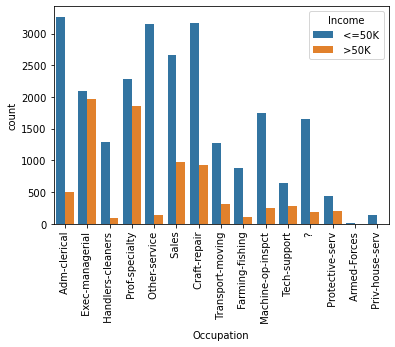

In [35]:
sns.countplot(x='Occupation', hue='Income', data = ReadAdultData)
plt.xticks(rotation = 90)

<h3>Columns that Contains Numerical Datasets</h3>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final_Weight'}>],
       [<AxesSubplot:title={'center':'Education_Number_of_Years'}>,
        <AxesSubplot:title={'center':'Capital_Gain'}>],
       [<AxesSubplot:title={'center':'Capital_Loss'}>,
        <AxesSubplot:title={'center':'Hours_per_Week'}>]], dtype=object)

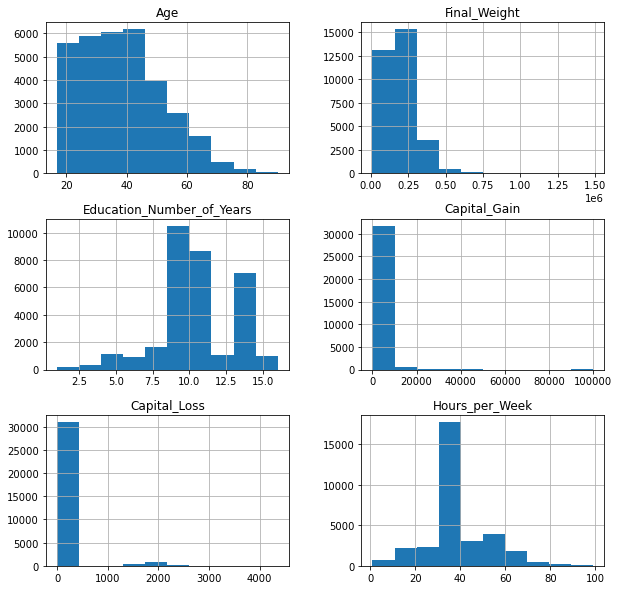

In [36]:
ReadAdultData.hist(figsize=(10,10))

<h3>Correlation between Numerical columns</h3>
<p style="font-size:15px">Income has 34% correlation with ‘Education_num’, 23% correlation with ‘hours_per_week’ and ‘age’, and 22% correlation with ‘Capital_gain’. The correlations are moderate.</p>

<AxesSubplot:>

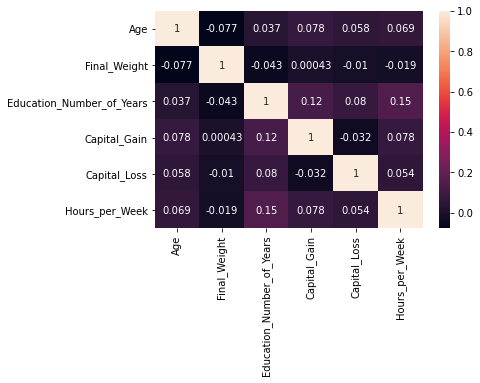

In [37]:
sns.heatmap(ReadAdultData.corr(), annot=True)

<h2> Capture the columns with missing values and work on them using mode</h2>

In [38]:
missingVualuesColumn = ['Work_Class', 'Occupation', 'Native_Country']
for col in missingVualuesColumn:
      ReadAdultData[col].fillna(ReadAdultData[col].mode()[0], inplace=True)

<h2> Conversion of categorical to numerical</h2>

In [39]:
from sklearn.preprocessing import LabelEncoder
ConvertCat =  LabelEncoder()
ReadAdultData.columns

Index(['Age', 'Work_Class', 'Final_Weight', 'Education',
       'Education_Number_of_Years', 'Marital_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_Week', 'Native_Country', 'Income'],
      dtype='object')

<h2>Select Categorical Columns to Encode</h2>

<h2>Check for the uniqueness of the income column and convert it to 0's ad 1's</h2>

In [40]:
cat_col_to_encode= ['Work_Class','Education','Marital_Status', 'Occupation', 'Relationship', 'Race','Sex','Native_Country']

In [41]:
print(pd.unique(ReadAdultData['Income']))

[' <=50K' ' >50K']


In [42]:
def income(options):
    if options == ' <=50K':
        return 0
    if options == ' >50K':
        return 1

In [43]:
ReadAdultData['Income'] = ReadAdultData['Income'].apply(income)

In [44]:
ReadAdultData['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64

In [45]:
ReadAdultData_new = pd.get_dummies(ReadAdultData, columns=cat_col_to_encode, drop_first=True)

In [46]:
ReadAdultData_new.head()

,Age,Final_Weight,Education_Number_of_Years,Capital_Gain,Capital_Loss,Hours_per_Week,Income,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2>Normalization of DataSet</h2>
<p>The next step is to normalize the data, since there are certain columns with very small values and some columns with high values. This process is important as values on a similar scale allow the model to learn better.
We use standard scaler for this process –
‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance’</p>

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ScalerData = StandardScaler()

In [49]:
ScalingData = ReadAdultData_new.drop('Income', axis='columns')
dataY = ReadAdultData_new['Income']
print(dataY)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64


In [50]:
ScaledData = ScalerData.fit_transform(ScalingData)
dataX = pd.DataFrame(ScaledData, columns=ScalingData.columns)
print(dataX)

            Age  Final_Weight  Education_Number_of_Years  Capital_Gain  \
0      0.030671     -1.063611                   1.134739      0.148453   
1      0.837109     -1.008707                   1.134739     -0.145920   
2     -0.042642      0.245079                  -0.420060     -0.145920   
3      1.057047      0.425801                  -1.197459     -0.145920   
4     -0.775768      1.408176                   1.134739     -0.145920   
...         ...           ...                        ...           ...   
32556 -0.849080      0.639741                   0.746039     -0.145920   
32557  0.103983     -0.335433                  -0.420060     -0.145920   
32558  1.423610     -0.358777                  -0.420060     -0.145920   
32559 -1.215643      0.110960                  -0.420060     -0.145920   
32560  0.983734      0.929893                  -0.420060      1.888424   

       Capital_Loss  Hours_per_Week  Work_Class_ Federal-gov  \
0          -0.21666       -0.035429            

In [51]:
training_data = pd.concat([dataY, dataX], axis=1,join='inner')
training_data.head()

,Income,Age,Final_Weight,Education_Number_of_Years,Capital_Gain,Capital_Loss,Hours_per_Week,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
0,0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
1,0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
2,0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
3,0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
4,0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173


<h2>Feature Selection</h2>

In [52]:
from sklearn.feature_selection import SelectKBest,chi2
np.seterr(divide='ignore',invalid='ignore')
Feature_selector=SelectKBest(k=training_data.shape[1])

In [53]:
training_selected_features=Feature_selector.fit_transform(training_data, dataY)
selected_cols = Feature_selector.get_support(indices=True)

# selected features
selected_feature_names = training_data.columns.values[selected_cols]
training_selected_features = pd.DataFrame(training_selected_features)

In [54]:
scores = Feature_selector.scores_[Feature_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

In [55]:
Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

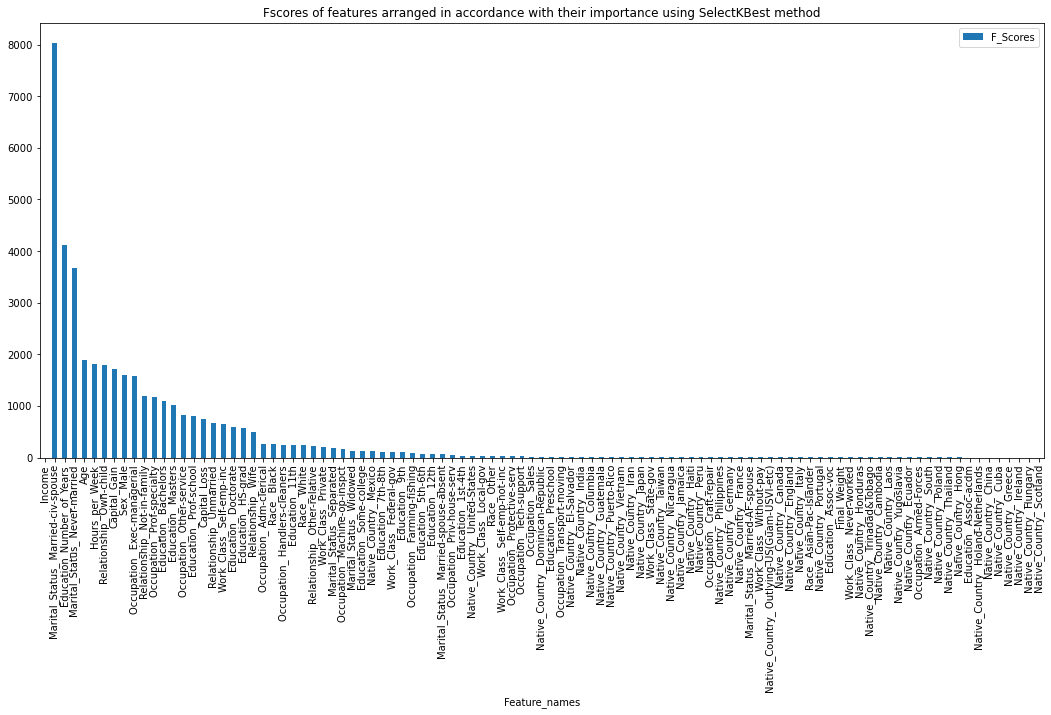

In [56]:
Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='Fscores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
#Setting the F score threshold as 30, we get a total of 30 features which have F scores beyond this value

kbest_selector=SelectKBest(k=15)
training_selected_features=kbest_selector.fit_transform(training_data,dataY)

<h2>Models</h2>

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
DTC = DecisionTreeClassifier()
GNB = GaussianNB()
SVC = SVC()
KNN = KNeighborsClassifier()
LG = LogisticRegression()

In [59]:
x_train, x_test, y_train, y_test = train_test_split(training_data,dataY, test_size = 0.2, random_state = 101)
for i in [DTC, GNB, SVC, KNN, LG]:
    i.fit(x_train, y_train)
    prediction = i.predict(x_test)
    test_score = accuracy_score(y_test, prediction)
    train_score = accuracy_score(y_train, i.predict(x_train))
    if abs(train_score - test_score) <= 0.01:
        print(i)
        print('Accuracy score for train data: ' , accuracy_score(y_test, prediction))
        print('Accuracy score for test data: ' , accuracy_score(y_train, i.predict(x_train)))
        print(classification_report(y_test, prediction))
        print(confusion_matrix(y_test, prediction))
        print('\n--------------------------------------------\n')

DecisionTreeClassifier()
Accuracy score for train data:  1.0
Accuracy score for test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4972
           1       1.00      1.00      1.00      1541

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513

[[4972    0]
 [   0 1541]]

--------------------------------------------

GaussianNB()
Accuracy score for train data:  1.0
Accuracy score for test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4972
           1       1.00      1.00      1.00      1541

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513

[[4972    0]
 [   0 1541]]

--------------------------------------------

SVC()
Accuracy sco

In [60]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
RFC = RandomForestClassifier()
AD = AdaBoostClassifier()
GD = GradientBoostingClassifier()

In [61]:
x_train, x_test, y_train, y_test = train_test_split(training_data, dataY, test_size = 0.2, random_state = 101)
for i in [RFC, AD, GD]:
    i.fit(x_train, y_train)
    prediction = i.predict(x_test)
    test_score = accuracy_score(y_test, prediction)
    train_score = accuracy_score(y_train, i.predict(x_train))
    if abs(train_score - test_score) <= 0.01:
        print(i)
        print('Accuracy score for train data: ' , accuracy_score(y_test, prediction))
        print('Accuracy score for test data: ' , accuracy_score(y_train, i.predict(x_train)))
        print(classification_report(y_test, prediction))
        print(confusion_matrix(y_test, prediction))
        print('\n--------------------------------------------\n')

RandomForestClassifier()
Accuracy score for train data:  1.0
Accuracy score for test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4972
           1       1.00      1.00      1.00      1541

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513

[[4972    0]
 [   0 1541]]

--------------------------------------------

AdaBoostClassifier()
Accuracy score for train data:  1.0
Accuracy score for test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4972
           1       1.00      1.00      1.00      1541

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513

[[4972    0]
 [   0 1541]]

--------------------------------------------

GradientBo

<h3>Cross Validation</h3>
<p>The goal of cross-validation is to test the model’s ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem)</p>

In [62]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv = cross_val_score(GD, training_data, dataY, cv = i)
    print(GD, cv.mean())

GradientBoostingClassifier() 1.0
GradientBoostingClassifier() 1.0
GradientBoostingClassifier() 1.0
GradientBoostingClassifier() 1.0
GradientBoostingClassifier() 1.0
GradientBoostingClassifier() 1.0
GradientBoostingClassifier() 1.0
GradientBoostingClassifier() 1.0


In [63]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv = cross_val_score(RFC, training_data, dataY, cv = i)
    print(RFC, cv.mean())

RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,100):
    cv = cross_val_score(RFC, training_data, dataY, cv = 11)
    print(RFC, cv.mean())

RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestClassifier() 1.0
RandomForestCl